# **READ BEFORE CONTINUE**

> Untuk mendapatkan akses edit kalian bisa membuat copy di perangkat kalian masing-masing dengan menggunakan akun gmail masing-masing (Menu File -> Save copy in Drive)

# **Modul 4 Pemrograman Fungsional 2025**

---
First Class Function


Disusun oleh:
1. Fera Putri Ayu L., S.Kom., M.T.
2. Alfi Aulia Azzahra
3. Rahmatun Nikmah

Presented by: Tim Laboratorium Informatika Universitas Muhammadiyah Malang

# Tujuan Praktikum

 Sub-CPMK 7: Mahasiswa mampu mendesain program dengan teknik yang tepat untuk menyelesaikan masalah dengan menggunakan paradigma pemrograman fungsional (P6)

# Target Modul

1. Mampu mengelola First Class Function secara fleksibel berdasarkan paradigma
pemrograman fungsional
2. Mampu memahami dan menerapkan konsep lambda expression, currying, closure, hingga
decorator
3. Mampu mengelola dan memanfaatkan fitur-fitur paradigma pemrograman fungsional
dalam menyelesaikan masalah komputasi

# 1. First Class Function

Pernahkah kamu mendengar istilah *first class* di kehidupan sehari-hari? Biasanya kata ini identik dengan sesuatu yang memiliki **hak istimewa** atau  *privilege khusus*. Seperti hal nya pelayanan kelas satu dalam transportasi yang memberikan akses lebih bebas dibanding kelas biasa. Nah, dalam dunia pemrograman, istilah **First-Class Function** juga punya makna serupa: fungsi diperlakukan sebagai "warga kelas satu" yang memiliki **hak istimewa** sama seperti tipe data lain (angka, string, atau objek).
>Artinya, fungsi bisa **diperlakukan layaknya data**: dapat disimpan di variabel, diteruskan sebagai parameter, dikembalikan dari fungsi lain, bahkan disimpan dalam struktur data.

Konsep ini membuka peluang besar untuk membuat kode yang fleksibel, lebih ringkas, dan lebih mudah digunakan kembali.

Dengan memandang fungsi sebagai data, kita bisa melakukan banyak hal yang mungkin sebelumnya tidak terpikirkan. Bayangkan, sebuah fungsi tidak hanya bisa "dipanggil", tapi juga bisa "dititipkan" ke variabel, "ditukar-tukar" melalui argumen fungsi lain, atau bahkan dikembalikan sebagai hasil dari sebuah proses. Untuk membuktikan bahwa hal ini memang bisa dilakukan, mari kita telusuri empat kemampuan utama yang dimiliki fungsi ketika diperlakukan sebagai *first-class citizen*.

## 1.1 Fungsi sebagai *variabel*

Mari kita mulai dengan kemampuan paling dasar dari konsep *First-Class Function*, yaitu menyimpan fungsi dalam variabel. Umumnya, saat mendengar kata "variabel", kita langsung teringat angka, string, atau list. Namun, dalam Python, sebuah fungsi pun bisa ditugaskan ke variabel. Bedanya, yang tersimpan bukan hasil eksekusi, melainkan **referensi** fungsi itu sendiri. Dengan kata lain, variabel tersebut tidak menyimpan nilai akhir, melainkan "jalan pintas" menuju fungsi.

In [2]:
# Moh. Khairul Umam - 202310370311448
# Fungsi sederhana untuk mengecek apakah bilangan positif
def is_positive(n):
    return n > 0

In [3]:
# Moh. Khairul Umam - 202310370311448
# Menyimpan fungsi is_positive ke dalam variabel check_number
check_number1 = is_positive
check_number2 = is_positive(1)
#percobaan1


In [4]:
# Moh. Khairul Umam - 202310370311448
# Bukti 1: Cek tipe data
print(type(check_number1))  # Output: <class 'function'>
print(type(check_number2))  # Output: <class 'bool'>

# Bukti 2: Memanggil check_number1 sebagai fungsi
print(check_number1(5))   # Output: True
print(check_number1(-3))  # Output: False

# Bukti 3: check_number2 bukan fungsi, jadi tidak bisa dipanggil
print(check_number2)      # Output: True
# print(check_number2(5)) # Error: 'bool' object is not callable

# Bukti 4: Keduanya menunjuk ke objek yang berbeda
print(callable(check_number1))  # Output: True (bisa dipanggil)
print(callable(check_number2))  # Output: False (tidak bisa dipanggil)

<class 'function'>
<class 'bool'>
True
False
True
True
False


```
📌 Latihan 1 - Fungsi sebagai Variabel
```

Jalankan kedua cell diatas, menurut kalian variabel manakah yang benar-benar menyimpan fungsi? `check_number1` atau `check_number2`? Jelaskan dan Buktikan!

## 1.2 Fungsi sebagai Parameter

Setelah mengetahui bahwa fungsi bisa disimpan di variabel, langkah berikutnya adalah mengirim fungsi itu sebagai argumen ke fungsi lain. Ini mungkin terdengar sedikit abstrak, tapi manfaatnya besar: kita bisa membuat sebuah fungsi yang "generik" dan perilakunya ditentukan oleh fungsi yang kita berikan sebagai parameter. Konsep ini sering digunakan dalam pemrograman fungsional, misalnya pada fungsi bawaan Python seperti `map`, `filter`, atau `reduce`.

In [ ]:
# Beberapa operasi sederhana
def add(a, b):
    return a + b

def divide(a, b):
    return a / b if b != 0 else "Error: division by zero"

# Fungsi yang menerima fungsi lain sebagai parameter
def operate(func, x, y):
    """Menjalankan fungsi yang diberikan dengan argumen x dan y"""
    return func(x, y)

In [ ]:
# Coba kirimkan fungsi yang berbeda-beda
print(operate(add, 10, 5))
print(operate(divide, 10, 2))

15
5.0


Dalam contoh ini, fungsi `operate` tidak tahu harus melakukan operasi apa. Ia hanya tahu menerima sebuah fungsi `func` dan dua angka. Fungsi mana yang digunakan, sepenuhnya tergantung pada argumen yang kita berikan. Jika kita memberikan `add`, maka yang terjadi penjumlahan. Jika kita memberikan `divide`, maka yang terjadi pembagian. Dengan pendekatan ini, satu fungsi `operate` dapat melayani berbagai logika sekaligus tanpa harus ditulis ulang. Inilah yang membuat kode menjadi lebih fleksibel dan mudah digunakan kembali.

## 1.3 Fungsi sebagai Return Value

Kemampuan berikutnya bahkan lebih menarik: sebuah fungsi bisa mengembalikan fungsi lain sebagai hasil kembalian (*return value*).

Dalam konsep fungsi sebagai return value, sering kali kita menggunakan *nested function* (fungsi di dalam fungsi). Salah satu alasannya adalah karena nilai yang dikembalikan oleh suatu fungsi harus berasal dari dalam fungsi itu sendiri, bukan dari konteks luar yang tidak terkontrol. Ibaratnya, kita nggak bisa ngasih sesuatu yang nggak kita punya. Dengan menuliskan fungsi di dalam fungsi, kita memastikan bahwa return value benar-benar merupakan hasil dari proses komputasi internal — seperti hasil operasi atau transformasi data yang dilakukan di dalam fungsi tersebut.



Pendekatan ini juga selaras dengan prinsip ***pure function***, yang hasilnya hanya bergantung pada argumen yang diberikan dan tidak menimbulkan efek samping (*side effects*). Dengan *nested function*, kita dapat membatasi ruang lingkup (*scope*) variabel dan logika agar tidak bergantung pada nilai atau kondisi eksternal, sehingga hasil fungsi tetap konsisten dan mudah diuji.

Dengan kata lain, penggunaan nested function bukan hanya untuk mengatur struktur kode, tetapi juga untuk menjaga kemurnian dan keterprediksian hasil fungsi dalam paradigma pemrograman fungsional.
 Konsep ini juga erat kaitannya dengan *closure*, yaitu fungsi yang tetap membawa serta konteks dari lingkup asalnya.

In [ ]:
# Fungsi pembuat salam sesuai bahasa
def greeting(language):
    def say_hello(name):
        if language == "id":
            return f"Halo, {name}!"
        elif language == "en":
            return f"Hello, {name}!"
        else:
            return f"Hi, {name}!"
    return say_hello


In [ ]:
# Membuat dua fungsi salam berbeda
greet_id = greeting("id")
greet_en = greeting("en")

print(greet_id)
print(greet_id("Elga"))
print(greet_en("Hisyam"))

<function greeting.<locals>.say_hello at 0x7d78b8797c40>
Halo, Elga!
Hello, Hisyam!


Perhatikan, saat kita memanggil `greeting("id")`, hasilnya adalah sebuah fungsi `say_hello` yang "mengingat" bahwa bahasa yang dipilih adalah Indonesia. Begitu juga dengan `greeting("en")` yang menghasilkan fungsi salam berbahasa Inggris. Inilah contoh sederhana dari **closure**: fungsi yang dikembalikan masih membawa konteks variabel dari lingkup asalnya (`language`). Dengan teknik ini, kita bisa membuat fungsi-fungsi baru secara dinamis tanpa harus mendefinisikan semuanya satu per satu.

## 1.4 Fungsi di dalam Struktur Data

Setelah memahami bahwa fungsi bisa disimpan dalam variabel, maka tidak mengherankan jika fungsi juga bisa disimpan di dalam struktur data seperti *list*, *tuple*, atau bahkan *dictionary*. Dengan cara ini, fungsi dapat dikelompokkan layaknya sekumpulan item yang bisa diakses melalui indeks atau kunci. Hal ini sangat berguna saat kita ingin mengelola banyak fungsi sekaligus, misalnya menyediakan beberapa jenis operasi dan memanggilnya sesuai kebutuhan pengguna. Mari kita lihat contohnya berikut.

In [ ]:
# Definisi fungsi Aritmatika
def add(a, b):
    return a + b

def multiply(a, b):
    return a * b

def make_power(n):
    """Menghasilkan fungsi pangkat n"""
    def power(x):
        return x ** n
    return power


In [ ]:
# Membuat fungsi closure square (pangkat 2)
square = make_power(2)

# Menyimpan berbagai fungsi dalam sebuah list
operations = [
    add,                      # fungsi penjumlahan
    multiply,                 # fungsi perkalian
    lambda a, b: a - b,       # fungsi anonim untuk pengurangan
    square                    # fungsi hasil closure
]

# Memanggil fungsi sesuai urutan indeks
print(operations[0](10, 5))  # add(10, 5)
print(operations[1](10, 5))  # multiply(10, 5)
print(operations[2](10, 5))  # lambda(10, 5)
print(operations[3](6))      # square(6)

15
50
5
36


Jika kita perhatikan, keempat elemen dalam list `operations` memiliki perilaku yang berbeda-beda. Tiga diantaranya menerima dua argumen, sedangkan fungsi `square` hanya menerima satu argumen karena sudah "dikunci" dengan `n=2` pada saat closure dibuat. Dengan cara ini, satu struktur data dapat menampung fungsi dengan bentuk logika yang berbeda.

### Perbedaan Fungsi dengan dan tanpa Tanda Kurung

Sekarang muncul pertanyaan penting: mengapa saat kita menyimpan fungsi ke dalam struktur data, terkadang kita menuliskannya dengan tanda kurung, dan terkadang tanpa tanda kurung? Jawabannya bergantung pada apa yang ingin kita simpan. Jika kita menuliskan nama fungsi tanpa tanda kurung, misalnya `add`, maka yang kita simpan adalah *referensi fungsi*. Artinya, fungsi itu belum dijalankan, dan baru akan dipanggil ketika kita menambahkan tanda kurung di kemudian hari. Sebaliknya, jika kita menuliskan `add(10, 5)` dengan tanda kurung, maka yang tersimpan bukan lagi fungsi, melainkan hasil dari eksekusi fungsi tersebut, yaitu sebuah nilai.

In [ ]:
func_list = [
    add,             # referensi fungsi add
    multiply,        # referensi fungsi multiply
    add(10, 5),      # hasil eksekusi fungsi add
    multiply(4, 3)   # hasil eksekusi fungsi multiply
]

# Mengakses fungsi yang disimpan sebagai referensi
print(func_list[0](7, 8))   # add(7, 8)
print(func_list[1](2, 5))   # multiply(2, 5)

15
10


In [ ]:
# Mengakses elemen yang menyimpan hasil eksekusi, bukan fungsi
print(func_list[2])
print(func_list[3])

15
12


Pada contoh ini, elemen pertama dan kedua dari `func_list` masih berupa fungsi, sehingga bisa dipanggil lagi dengan argumen tertentu. Namun, elemen ketiga dan keempat sudah berisi angka, karena kita menyimpannya dengan tanda kurung saat membuat list, sehingga Python langsung mengeksekusi fungsi tersebut. Inilah alasan mengapa kita perlu memperhatikan penggunaan tanda kurung: apakah kita ingin menyimpan fungsi itu sendiri untuk dipanggil nanti, atau langsung menyimpan hasil dari eksekusinya.

Dengan memahami perbedaan ini, kita bisa memanfaatkan fungsi di dalam struktur data secara lebih efektif. Misalnya, kita dapat membuat *dictionary* yang berisi nama operasi sebagai kunci, lalu fungsi sebagai nilainya. Ini sangat berguna untuk membangun sistem seperti kalkulator, router, atau bahkan command handler yang bisa memilih logika sesuai input pengguna.


In [ ]:
# Menggunakan dictionary untuk menyimpan fungsi
operation_dict = {
    "add": add,
    "multiply": multiply,
    "square": square
}

print(operation_dict["add"](7, 8))
print(operation_dict["multiply"](4, 6))
print(operation_dict['square'](9))

15
24
81


Pendekatan ini memberikan fleksibilitas besar: cukup dengan memilih kunci dictionary, kita bisa langsung menjalankan fungsi yang sesuai. Teknik seperti ini banyak digunakan dalam implementasi menu dinamis, command line interface, hingga framework yang mengatur alur logika berdasarkan event.



> Jadi bagian fungsi di dalam struktur data bukan hanya tentang “ya, fungsi bisa dimasukkan ke list atau dict”, tetapi juga tentang bagaimana fungsi tersebut disimpan (referensi vs hasil eksekusi), serta bagaimana hal ini memungkinkan desain kode yang lebih dinamis dan modular.



# 2. Lambda Expression

Jika sebelumnya kita sudah membahas bahwa Python memperlakukan fungsi sebagai *first-class citizen*, maka salah satu bentuk nyata dari “privilege” tersebut adalah adanya **lambda expression**. Berbeda dengan fungsi biasa yang ditulis menggunakan kata kunci `def`, lambda memungkinkan kita membuat sebuah fungsi *tanpa nama* atau sering disebut *anonymous function*.
>Kenapa disebut *expression* dan bukan sekadar fungsi?

>Karena lambda lebih dekat dengan ekspresi matematis: menerima input lalu langsung menghasilkan output, tanpa perlu baris kode panjang atau definisi formal.

Sebagaimana saat kita menulis sebuah fungsi matematika:

`f(x)=2x`

maka struktur lambda expression pun disusun mengikuti pola matematis:
```
lambda parameter: ekspresi
```

In [ ]:
lambda x: 2*x

Lambda biasanya dipakai ketika kita hanya butuh fungsi kecil yang digunakan sekali saja atau dalam konteks yang sangat singkat. Daripada repot menuliskan definisi lengkap, cukup dengan satu baris ekspresi, kita sudah punya fungsi yang siap pakai.

Misalnya, kalau kita ingin membuat fungsi pengurangan dengan cara biasa, kita menuliskannya seperti ini:

In [ ]:
def kurang(a, b):
    return a - b

print(kurang(10, 4))

6


Namun, dengan lambda, kode yang sama bisa ditulis jauh lebih ringkas:

In [ ]:
pengurangan = lambda a, b: a - b
print(pengurangan(10, 4))

6


Kedua potongan kode menghasilkan hal yang sama, hanya saja versi lambda lebih pendek dan praktis. Perlu diingat bahwa `a` dan `b` hanyalah parameter biasa. Kita bebas menamainya sesuai kebutuhan, tapi umumnya dipilih nama singkat seperti `x` atau `y` karena tujuan lambda adalah menyederhanakan kode, bukan menambah kompleksitas.

## 2.1 Lambda sebagai variabel

Karena lambda tidak memiliki nama, biasanya ia disimpan dalam sebuah variabel agar mudah digunakan kembali. Dengan cara ini, lambda berperilaku sama persis seperti fungsi biasa, hanya cara penulisannya yang lebih singkat.

In [ ]:
# lambda untuk menghitung kuadrat
square = lambda x: x**2
print(square(5))

25


In [ ]:
# lambda untuk menjumlahkan dua angka
add = lambda x, y: x + y
print(add(3, 7))

10


## 2.2 Lambda sebagai argumen fungsi

Salah satu kekuatan utama lambda adalah kemampuannya untuk digunakan langsung sebagai argumen fungsi lain, tanpa harus disimpan terlebih dahulu ke dalam variabel. Teknik ini sangat berguna ketika dipadukan dengan fungsi `map()`, `filter()`, atau `reduce()` yang telah kita pelajari pada modul 3 sebelumnya. Perhatikan contoh berikut:

In [6]:
# Moh. Khairul Umam - 202310370311448
data = filter(lambda x: x % 2, range(10))
hasil = map(lambda x: str(x * 10) + '%', data)
print(list(hasil))
#percobaan2

['10%', '30%', '50%', '70%', '90%']


Di sini, kita bisa langsung memanfaatkan lambda expression tanpa perlu mendefinisikan (*define*/`def`) fungsi logika untuk memfilter angka, demikian juga dengan fungsi transformasinya. Fungsi kecil yang hanya digunakan sekali bisa langsung ditulis sebagai lambda di dalam argumen.



```
📌 Latihan 2 - lambda sebagai argumen fungsi
```
Jalankan dan tampilkan hasil dari sel percobaan diatas serta amati hasilnya! Fungsi logika dan transformasi apakah yang dibangun dengan lambda disana sehingga menghasilkan keluaran seperti itu? Berikan penjelasan secara runut!


## 2.3 Eksekusi langsung

Selain disimpan ke variabel atau dikirim ke fungsi lain, lambda juga bisa dieksekusi langsung begitu dituliskan. Teknik ini sering digunakan untuk fungsi sederhana yang tidak akan dipakai ulang.

In [ ]:
# lambda langsung dieksekusi dengan dua argumen
print((lambda x, y: x * y)(4, 5))

20


Pada contoh di atas, kita tidak pernah menyimpan lambda ke dalam variabel. Fungsi langsung didefinisikan dan dieksekusi dalam satu baris.

---
Meskipun ringkas dan praktis, lambda punya beberapa keterbatasan:

1.   Lambda hanya bisa berisi satu ekspresi sederhana, sehingga tidak cocok untuk logika yang kompleks dengan banyak baris kode.

2.   Meski bisa menggunakan `if`, bentuknya hanya terbatas pada ekspresi kondisional tunggal, bukan struktur kontrol penuh dengan `if-elif-else` panjang atau loop seperti `for` dan `while`.

3. Karena sifatnya anonim, nama fungsi tidak bisa ditetapkan langsung; kita hanya bisa menyimpannya lewat variabel. Oleh sebab itu, lambda paling cocok digunakan untuk **fungsi kecil dan inline**, bukan untuk logika yang besar dan rumit.


Lambda expression memberi kita cara singkat untuk menuliskan fungsi sederhana. Ia bisa disimpan ke variabel, digunakan langsung sebagai argumen fungsi lain, bahkan dieksekusi secara instan. Meski tidak bisa menggantikan fungsi penuh dengan `def`, lambda sangat bermanfaat ketika kita butuh sesuatu yang cepat, ringkas, dan hanya digunakan sekali saja. Dalam kombinasi dengan konsep *first-class function*, lambda membantu membuat kode Python lebih ekspresif dan elegan.

# 3. High Order Function

Kalau kamu sudah paham tentang **First-Class Function**, maka Higher-Order Function (HOF) adalah penerapannya dalam bentuk yang lebih konkret. Secara sederhana, sebuah fungsi disebut HOF jika ia bisa:

1. Menerima fungsi sebagai parameter (*input*), atau

2. Mengembalikan fungsi sebagai hasil (*output*).

Dengan kata lain, HOF memanfaatkan sifat *first-class* dari fungsi untuk menciptakan perilaku yang lebih dinamis, reusable, dan modular. Contoh sederhana HOF bisa ditemukan pada fungsi seperti `map()`, `filter()`, atau `reduce()` yang menerima fungsi lain untuk menentukan bagaimana data diproses.


## 3.1 Menerima sebuah fungsi sebagai parameter input

Bayangkan kita ingin membuat satu fungsi “umum” yang tugasnya bukan menghitung sesuatu secara spesifik, melainkan *menjalankan logika yang kita berikan*. Artinya, fungsi tersebut menerima *fungsi lain* sebagai parameter. Dengan cara ini, satu kerangka kerja dapat dipakai ulang untuk berbagai operasi — cukup ganti fungsi yang dikirim.

In [ ]:
# Contoh fungsi yang akan dijadikan sebagai argumen/input dari fungsi lain
def kali (a,b):
  return a * b

def tambah(a,b):
  return a + b

def kurang(a, b):
  return a - b

# fungsi orde tinggi yang menerima input fungsi
def hitung(a, operasi, b):
  # Menjalankan fungsi operasi dengan dua input (a dan b)
  return operasi(a, b)

In [ ]:
# mengirim fungsi tambah sebagai input parameter fungsi hitung
hitung(3, tambah, 2)

5

In [ ]:
# mengirim fungsi kali sebagai input parameter fungsi hitung
hitung(5, kali, 2)

10

In [ ]:
# mengirim fungsi kurang sebagai input parameter fungsi hitung
hitung(11, kurang, 2)

9

 Dalam kode di atas, `hitung` tidak peduli apakah ia harus menambah, mengurangi, atau mengalikan. Tugas logika spesifiknya kita titipkan lewat parameter `operasi`. Inilah esensi HOF: kita pisahkan kerangka kerja umum dari detail logika.

---


 Dalam bahasa Python, terdapat built-in Higher Order Function (HOF) atau
fungsi-fungsi yang sudah disediakan oleh python untuk memudahkan kita.
Sebagaimana telah disebutkan sebelumnya,
>Contoh sederhana HOF bisa ditemukan pada fungsi seperti `map()`, `filter()`, atau `reduce()` yang menerima fungsi lain untuk menentukan bagaimana data diproses.

Nah, di modul ini kita akan mengimplementasikan lambda dalam HoF agar kode program kita menjadi lebih ringkas dan sederhana. Sebagaimana konsep dari paradigma fungsional itu sendiri. Penggunaan Built-In Function memudahkan kita dalam membuat program karena mereka sejenis dengan inline function sehingga membuat kinerja kode kita lebih bersih dan efisien.


### - Map

**map(func, iterable)** menerapkan fungsi satu-argumen ke setiap elemen dalam iterable dan menghasilkan iterator baru (lazy). Ini cocok untuk transformasi data: dari A menjadi B, elemen demi elemen.

Dulu, kita mungkin perlu bikin `def` fungsi dulu. Tapi sekarang... kita bisa langsung pakai `lambda`!

In [ ]:
# Menggunakan fungsi map untuk mengalikan setiap elemen dengan 2
numbers = [1, 2, 3, 4, 5]
result = map(lambda x: x * 2, numbers)

print(list(result))

[2, 4, 6, 8, 10]


Dalam contoh diatas kita mengimplementasikan konsep dari First Class dan juga High Order Function. Disini anonymous function lambda menjadi argumen dalam built-in HOF map.

 Fungsi `lambda` kita jadi argumen langsung buat si HOF `map`. Di sini, `map()` nerima dua "perintah": satu fungsi `(lambda x: x * 2)` dan satu data (`numbers`). Si lambda ini otomatis dijalanin untuk tiap angka di `numbers`.

 Kita juga bisa memisah lambda ke dalam variabel lain untuk `reusability and readable code`. Seperti berikut:

In [ ]:
# Menggunakan fungsi map untuk mengalikan setiap elemen dengan 2
numbers = [1, 2, 3, 4, 5]
kali = lambda x: x * 2
result = map(kali, numbers)

print(list(result))

[2, 4, 6, 8, 10]


Di sini, `map` meneruskan tiap elemen sebagai argumen tunggal ke fungsi `kali` (yang merupakan `lambda`). Ingat: hasil `map` adalah iterator, jadi untuk “melihat” isinya biasanya kita ubah ke `list` saat mencetak atau menguji.

### - Filter

Sesuai namanya, `filter(func, iterable)` itu tugasnya menyaring. Dia bakal cek tiap item di data kamu pakai sebuah "fungsi logika".

Kalau itemnya lolos (fungsinya bilang `True`), item itu boleh masuk. Kalau nggak (fungsi bilang `False`), ya out!

In [ ]:
# Moh. Khairul Umam - 202310370311448
angka_ganjil = filter(lambda x: x % 2, numbers)
print("Hasil: ", list(angka_ganjil))

Hasil:  [1, 3, 5]


`lambda x: x % 2` langsung bertindak sebagai "aturan main". `filter` akan ngasih tiap angka ke `lambda` ini. Kalau lambda-nya bilang `True` (nilai 1 untuk x % 2), angkanya disimpan.

Contoh lain, nyaring data teks:

In [ ]:
data = ["kelapa", "apel", "kiwi", "jeruk", "aprikot"]

# mem-filter elemen yang dimulai dengan huruf "a"
hasil = filter(lambda x: x.startswith("a"), data)

print(list(hasil))


['apel', 'aprikot']


Variabel 'hasil' akan berupa objek filter yang *lazy*. Berisi data hasil penyaringan yang berawalan huruf 'a'. Perlu diingat kembali bahwa hasil dari *lazy evaluation* tidak dapat langsung di-print. Untuk pengecekan hasil, kita dapat melakukan parsing data ke dalam `list()`, `tuple()`, atau `set()` sebelum memanggil fungsi `print()`.

### - Reduce

Beda sama `map` atau `filter` yang ngasih kamu *list* baru, **reduce** itu "meringkas" atau "menggulung" semua item di list kamu jadi **satu nilai tunggal**. Bayangin kayak kamu ngelipet kertas besar jadi satu lipetan kecil.



Jangan lupa, karena fungsi ini spesial, dia ada di modul `functools`, jadi harus kita `import` dulu.

In [ ]:
# Moh. Khairul Umam - 202310370311448
from functools import reduce

#menggunakan lambda
fungsi_lambda = reduce(lambda x,y: x * y, range(1,6))

print(fungsi_lambda)

120


 Perbedaan `reduce` dengan `map/filter` terdapat pada output/return value yang dihasilkan. Ketika `map/filter` mengembalikan sebuah iterable baru, output dari `reduce` adalah sebuah nilai tunggal.

```
📌 Latihan 3  - Reduce
```
Selain itu, kenapa parameter fungsi lambda yang digunakan dalam reduce berbeda dengan pada map/filter? Tahukah kalian dimana bedanya? Apa yang terjadi jika fungsi lambda pada `#percobaan3` diubah menjadi `lambda x: x % 2` atau `lambda x: x * 2`seperti di fungsi map/filter? Jelaskan argumen kalian!

### Tabel Perbedaan Map, Filter, dan Reduce

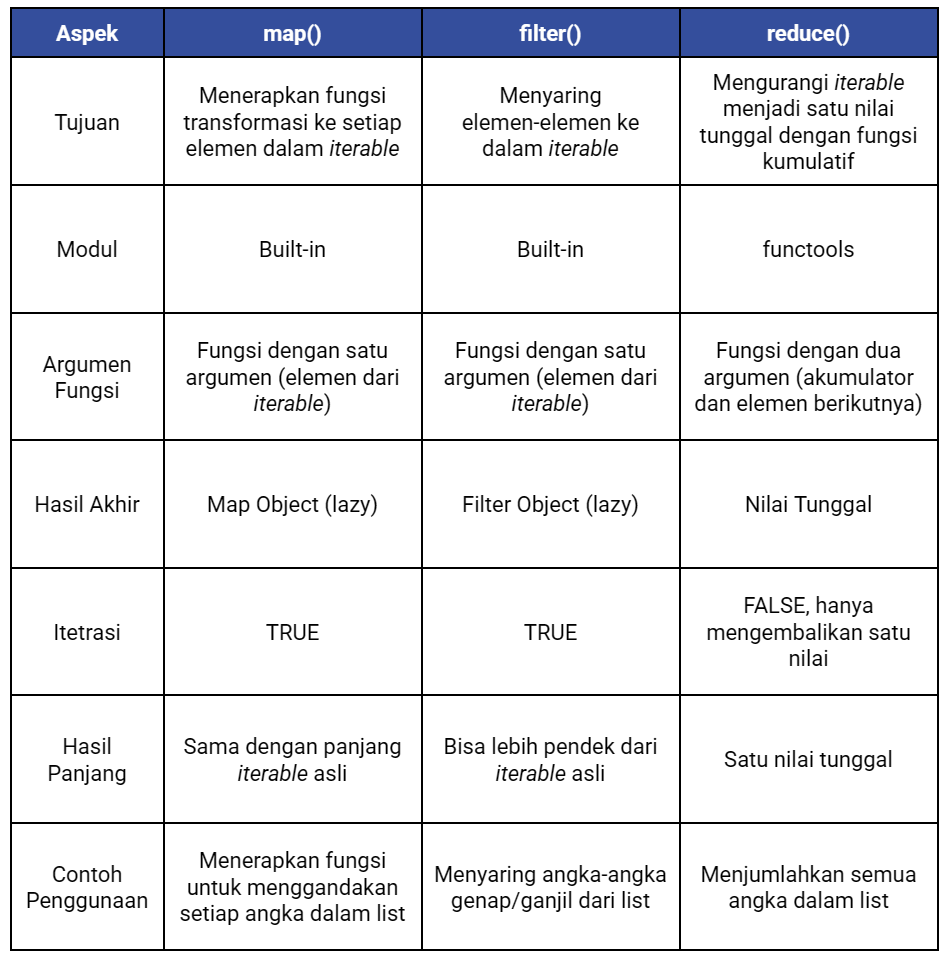

## 3.2 Mengembalikan sebuah fungsi sebagai return value

HOF tidak hanya “menerima” fungsi — ia juga bisa “menghasilkan” fungsi baru. Biasanya ini dilakukan dengan *nested function* yang memanfaatkan *closure*. Pendekatan ini bermanfaat untuk membuat fungsi yang sudah dikustomisasi sebelumnya. Bagian ini sebenarnya sama dengan materi poin 1.3. Karena sesungguhnya HOF adalah implementasi konkret dari first-class function itu sendiri.

In [7]:
# Moh. Khairul Umam - 202310370311448

def operasi(n):
  def tambah(x):
    return n + x
  return tambah

tambah_5 = operasi(5)
print("Hasil: ", tambah_5(7))
#percoban4

Hasil:  12


In [8]:
operasi(5)(7)

12

  Dalam kode di atas, fungsi `operasi` menerima satu argumen `n` dan mengembalikan sebuah fungsi bernama `tambah` sebagai nilai kembalian. **Agar dapat dikirim sebagai return value, maka fungsi `tambah` perlu didefinisikan di dalam fungsi sebagai bagian dari fungsi (inner function).** Fungsi `tambah` ini, pada gilirannya, menerima satu argumen `x` dan mengembalikan hasil penjumlahan dari `n` dan `x`.

# 4. Currying


## 4.1 Apa itu Currying?

Currying adalah salah satu teknik dalam pemrograman fungsional yang berfungsi untuk mengubah sebuah fungsi dengan banyak parameter menjadi serangkaian fungsi yang masing-masing hanya menerima satu parameter. Konsep ini membuat setiap fungsi tampak seperti rantai, di mana hasil dari pemanggilan satu fungsi adalah fungsi baru yang menunggu argumen berikutnya.

>Dengan kata lain, fungsi yang awalnya seperti ini:
`f(a,b,c)`

>akan diubah menjadi:
`f(a)(b)(c)`

Artinya, fungsi f pertama menerima argumen a, kemudian menghasilkan fungsi lain yang menerima b, lalu menghasilkan fungsi berikutnya yang menerima c, hingga akhirnya mengembalikan hasil akhir.

Dengan kata lain, currying memecah fungsi multi-parameter menjadi fungsi-fungsi kecil yang berantai, di mana setiap fungsi hanya menangani satu argumen pada satu waktu. Teknik ini bukan hanya soal bentuk penulisan, tetapi juga membuka kemungkinan baru dalam hal fleksibilitas, komposisi, dan pemakaian ulang fungsi.



Contohnya sebagai berikut:

In [13]:
# fungsi biasa untuk melakukan operasi + pada input parameter a dan b
def tambah(a, b):
    return a + b

Jika kita panggil dengan dua argumen sekaligus, seperti:

In [14]:
tambah(5, 3)

8

hasilnya adalah 8. Fungsi ini langsung mengeksekusi proses penjumlahan tanpa perantara.

Jika kita “currying”-kan, bentuknya akan menjadi seperti ini:

In [15]:
# Moh. Khairul Umam - 202310370311448
# fungsi tambah dalam bentuk curry
def tambah(a):
    def inner(b):
        return a + b
    return inner
    #percoban4

Artinya `tambah(a)` tidak langsung menghitung, tapi mengembalikan fungsi baru yang menunggu argumen berikutnya `(b)`.

Kini, ketika kita memanggil:

In [12]:
# cara pemanggilan fungsi curry
tambah(5)(3)

8

hasilnya tetap 8, tetapi prosesnya berbeda. Pemanggilan `tambah(5)` tidak langsung memberikan hasil, melainkan **mengembalikan fungsi baru** yang masih menunggu satu argumen lagi, yaitu **b**.

Hanya setelah **b** diberikan (melalui pemanggilan berikutnya `(3)`), barulah perhitungan dilakukan dan hasil akhir muncul.

Dengan pendekatan ini, setiap langkah pemanggilan fungsi menghasilkan fungsi baru yang memiliki konteks tersendiri. Hal inilah yang menjadikan currying sangat fleksibel.

```
📌 Latihan 4 - Currying
```
Bandingkan fungsi `operasi(n)` pada poin 3.2 dengan fungsi `tambah(a)`! Menurut kalian apakah keduanya memiliki kesamaan atau perbedaan yang cukup berarti?. Jika secara garis besar sama, kenapa dibahas pada topik materi yang berbeda (3.2 tentang HOF; 4.1 tentang currying)? Apakah ada keterkaitan antara dua materi ini?

## 4.2 Lambda dan Currying

Menariknya, lambda juga bisa digunakan untuk mendemonstrasikan konsep *currying* dalam pemrograman fungsional. Dengan cara ini, fungsi bisa dieksekusi secara bertahap. Misalnya, mari kita ubah dulu fungsi `tambah(a)` pada materi currying bab 4.1 sebelumnya ke dalam bentuk lambda:


In [ ]:
lambda_tambah = lambda a: (lambda b: a + b)

Konsep ini sama hal nya dengan HOF tipe 2 (materi 3.2), yaitu fungsi `lambda a:` mengasilkan expresi/mereturn fungsi lain yang juga anonymous (`lambda b:`).
Sehingga fungsi lambda_tambah dapat dijalankan secara curry:

In [ ]:
# eksekusi langsung dengan cara curry
print(lambda_tambah(3)(4))

7


Maupun secara HOF:

In [ ]:
tambah3 = lambda_tambah(3)
tambah3(4)

7

Ketika kita memanggil `lambda_tambah(3)`, hasilnya adalah sebuah lambda baru yang masih menunggu argumen `b`. Saat lambda itu dipanggil lagi dengan `(4)`, barulah hasil perjumlahan dihitung.

lambda yang dieksekusi langsung seperti pada materi 2.3 sebelumnya sebenarnya juga merupakan penerapan dari konsep currying. Perhatikan kode berikut!

In [ ]:
print((lambda a: a*5)(5))

25


Kode diatas membuat fungsi anonim satu argumen `a` yang mengembalikan hasil `a*5`, lalu langsung diberikan nilai untuk parameter a disebelahnya (secara curry) yaitu 5, sehingga menghasilkan output 25.

## 4.3 Kenapa Currying Berguna?

Currying bukan sekadar gaya penulisan fungsi yang berbeda. Teknik ini memberikan beberapa keuntungan praktis dalam penulisan program, terutama yang menggunakan pendekatan fungsional. Berikut dua alasan utama mengapa currying sangat berguna:

**a. Reusable Functions (Dapat Digunakan Ulang)**

Dengan currying, kita dapat dengan mudah membuat versi baru dari suatu fungsi tanpa harus menulis ulang logika yang sama. Misalnya, jika kita punya fungsi `tambah(a)(b)` seperti pada materi 4.1 sebelumnya, maka kita bisa membuat fungsi `inc` untuk menambah nilai dengan angka 1, dan `loncat3` untuk melipatgandakan nilai dengan angka 3, dan seterusnya — hanya dengan mengisi sebagian argumen.
Seperti:

In [ ]:
# kita masih akan memanfaatkan fungsi tambah sebelumnya
inc = tambah(1)   # membuat fungsi inc dari fungsi tambah
loncat3 = tambah(3) # membuat fungsi loncat3 dari fungsi tambah

In [ ]:
# eksekusi fungsi
print(inc(9))
print(loncat3(5))

10
8


Kita tidak perlu lagi membuat fungsi `inc()` atau `loncat3()` secara manual. Cukup dengan “mengunci” argumen pertama, fungsi baru dapat diciptakan secara fleksibel. Ini membuat kode lebih modular dan mengurangi duplikasi.

Selain itu, currying membantu menjaga agar fungsi tetap kecil, sederhana, dan fokus pada satu tugas spesifik. Fungsi yang kecil ini lebih mudah diuji, dipelihara, serta digabungkan dengan fungsi lain dalam pipeline pemrosesan data.

**b. Mempermudah Komposisi Fungsi (Function Composition)**

Currying juga sangat membantu dalam **komposisi fungsi**, yaitu menggabungkan beberapa fungsi kecil menjadi satu alur pemrosesan yang lebih besar. Karena setiap fungsi hasil currying hanya menerima satu argumen, maka penyusunan fungsi berantai menjadi lebih alami.

Sebagai contoh, kita dapat menyusun fungsi seperti berikut:



In [ ]:
def tambah(x):
    return lambda y: x + y

def kali(x):
    return lambda y: x * y

hasil = kali(2)(tambah(3)(4))  # 2 * (3 + 4)
print(hasil)

14


Fungsi `kali(2)` akan menunggu hasil dari curry fungsi `tambah(3)(4)` sebagai argumen kedua untuk diproses dengan argumen pertama (yaitu 2). Dengan cara ini, fungsi dapat “disusun” layaknya rantai, yang menjadikan alur program yang lebih ekspresif dan mudah dibaca.

## 4.4 Currying vs Partial Application

Currying sering kali disamakan dengan partial application, padahal keduanya memiliki perbedaan penting meskipun sama-sama berhubungan dengan pengisian sebagian argumen fungsi.

* Currying adalah proses mengubah fungsi dengan banyak argumen menjadi rangkaian fungsi satu argumen. Setiap fungsi hanya menerima satu nilai dan mengembalikan fungsi baru yang menunggu argumen berikutnya.

>`tambah(a, b)` → `tambah(a)(b)`



* Partial Application	adalah proses mengisi sebagian argumen dari fungsi multi-argumen, tetapi fungsi hasilnya masih bisa menerima beberapa argumen sekaligus. Jadi tidak harus satu per satu seperti pada currying.

>`inc = tambah(1)` → fungsi baru (`inc`) menunggu satu argumen lagi untuk dapat dieksekusi

Konsep merupakan implementasi dari HOF

Jadi:
*   Currying adalah transformasi bentuk fungsi multi parameter menjadi fungsi dengan single parameter yang bersarang
*   Partial application adalah cara memanggil fungsi yang sudah di-curry (dengan fungsi bersarang) secara HOF.




---


Alamak, masih gapaham?? waduhh kita coba pakai analogi dehh

bayangkan kamu sedang membuat segelas teh manis.
Kamu memerlukan tiga bahan: air panas, gula, dan teh.

Jika kamu menggunakan pendekatan fungsi biasa, maka semua bahan dimasukkan sekaligus:



```
buatMinum(air, gula, teh)
```



Namun, dalam konsep currying, kamu menambahkan bahan satu per satu:


```
buatMinum(air)(gula)(teh)
```

Setiap kali kamu menambahkan satu bahan, kamu akan mendapatkan fungsi baru yang siap menerima bahan berikutnya.

Pendekatan ini lebih fleksibel karena kamu bisa “berhenti di tengah jalan” dan membuat fungsi baru dengan bahan yang berbeda.

Contohnya:

In [ ]:
#membuat fungsi curry
def buatMinum(bahan1):
    def inner(bahan2):
        def inner2(bahan3):
            return f"Minuman dengan {bahan1}, {bahan2}, dan {bahan3}"
        return inner2
    return inner

buatMinum('air')('gula')('teh')

'Minuman dengan air, gula, dan teh'

In [ ]:
#eksekusi fungsi curry dengan pendekatan partial aplication (argumen yang berbeda)
hotDrinks = buatMinum("air panas")("gula")
buatKopi = hotDrinks("kopi")
wedangJahe = hotDrinks("jahe geprek")

print(buatKopi)
print(wedangJahe)

Minuman dengan air panas, gula, dan kopi
Minuman dengan air panas, gula, dan jahe geprek


Pada kode di atas, `hotDrinks` adalah hasil partial application dari fungsi `buatMinum`, di mana kita telah menetapkan `air panas` dan `gula` terlebih dahulu, namun belum menentukan bahan terakhir. Nantinya, kita dapat menggunakan fungsi tersebut untuk membuat minuman apa pun, cukup dengan memberikan bahan ketiga.
Hasilnya, kita bisa membuat “kopi” atau “wedangJahe” tanpa perlu mendefinisikan fungsi baru untuk masing-masing.

Dengan demikian, dari satu fungsi curry `buatMinum` (yang general) kita bisa membuat banyak aplikasi parsial lainnya. Misal, kalian bisa saja membuat minumanDingin, gulaArenMilkBase, dan banyak varian lainnya.

Apakah sudah cukup tercerahkan, betapa wow nya konsep curry di pemrograman fungsional ini..

# 5. Closure

Pernah dengar istilah *closure*? Eits, jangan salah, ini bukan judul lagu milik Pamungkas ya. Dalam dunia pemrograman fungsional, closure adalah konsep ketika sebuah fungsi didefinisikan di dalam fungsi lain (*nested function*) dan tetap “mengingat” variabel dari lingkup fungsi luar meskipun lingkup tersebut sudah selesai dieksekusi (sudah return). Masih terasa abstrak? Mari kita bedah langsung dengan contoh kode sederhana berikut:

In [17]:
"""
desc:
outer_function: fungsi luar yang menerima angka dan mengembalikan inner_function
inner_function: fungsi dalam yang mengingat variabel 'factor' dari outer_function
inner_function menjadi closure karena menangkap variabel 'factor'
"""

def outer_function(factor):
    """Menyimpan nilai 'factor' dan mengembalikan fungsi inner_function"""
    def inner_function(number):
        """Mengalikan 'number' dengan 'factor' yang diingat dari outer_function"""
        return number * factor
    return inner_function

# Membuat closure yang mengingat factor = 5
multiplier = outer_function(5)
print(multiplier(10))

50


Jika diperhatikan, sekali lagi, fungsi diatas adalah sama dengan konsep HOF. Lalu, bagian mananya yang merupakan closure? Lakukan percobaan berikut untuk mendapatkan jawabannya:

In [18]:
# Moh. Khairul Umam - 202310370311448
# hapus fungsi outer_function
del outer_function
# panggil kembali fungsi multiplier
multiplier(100)
#percobaan5

500

```
📌 Latihan 5 - Closure
```
Jalankan cell diatas, dan amati hasilnya! apakah yang terjadi? Kenapa tidak terjadi error padahal fungsi `outer_function` sudah dihapus (`del`)? Jelaskan argumen kalian terkait closure ini!

## 5.1 Closure vs First Class Function

Apakah closure sama dengan *First Class Function*? Jawabannya: **tidak**. *First Class Function* adalah sifat dasar fungsional bahwa fungsi diperlakukan layaknya objek biasa—bisa disimpan dalam variabel, dijadikan argumen, atau dikembalikan sebagai nilai. Nah, closure adalah salah satu *implementasi nyata* dari sifat tersebut. Jadi, closure berdiri di atas konsep *First Class Function*.

## 5.2 Bukti Sifat Closure

Coba perhatikan kode ini:

In [ ]:
multiplier = outer_function(3)

# Menghapus fungsi outer_function
del outer_function

In [ ]:
print(multiplier(7))

21


In [ ]:
print(outer_function)

NameError: name 'outer_function' is not defined

Perhatikan: walaupun `outer_function` sudah kita `del` (hapus), `multiplier` tetap berjalan tanpa error! Kenapa bisa begitu? Karena closure sudah “membawa” variabel yang dibutuhkannya (yaitu `factor = 3`) saat pertama kali diciptakan. Dengan kata lain, closure menyimpan memori dari lingkup luar meskipun lingkup aslinya sudah hilang.

 Closure dinamakan demikian karena fungsi "menutup" lingkup di mana ia didefinisikan dan "mengikat" variabel-variabel dari lingkup tersebut, sehingga dapat mengakses dan menggunakan variabel-variabel tersebut meskipun dieksekusi di luar lingkup aslinya. Ini memungkinkan fleksibilitas dan modularitas yang lebih besar dalam pemrograman



---


Masih belum paham??? yaudah deh kita coba pakai analogi sederhana biar kalian bisa paham.

Bayangkan sebuah ruangan penuh barang (variabel). Lalu kamu mengambil sebuah kotak (fungsi dalam (*inner fuction*)) dan memasukkan beberapa barang dari ruangan ke dalamnya. Ketika kamu membawa kotak itu keluar ruangan, barang-barang di dalam kotak tetap ikut terbawa. Kamu bisa membuka kotak kapan saja dan menemukan barang-barang tadi, walaupun kamu sudah tidak ada di dalam ruangan. Itulah gambaran cara kerja closure.

# 6. Decorator

Kalau di materi sebelumnya kita sudah belajar tentang Higher-Order Function (HOF), maka **<a href="https://medium.com/@uulwake/apa-itu-decorators-dan-bagaimana-cara-menggunakannya-1f600485b382">Decorator</a>** bisa dibilang adalah bentuk “praktis” dari HOF. Secara sederhana, decorator adalah fungsi yang:


*   menerima fungsi lain sebagai argumen,
*   mengembalikan fungsi baru (wrapper),
*   menambahkan atau memodifikasi perilaku fungsi asli tanpa harus mengubah kode/perilaku fungsi tersebut.


Mari kita lihat contoh sederhana berikut. Kita akan membuat sebuah fungsi `pesan_decorator()` untuk menambahkan pesan pembuka dan penutup sebagai pembungkus fungsi lain (dalam hal ini fungsi `sapa()`).

In [ ]:
# Fungsi ini akan berperan sebagai decorator
def pesan_decorator(func):
    def wrapper():
        print("fungsi ini dimulai")
        func()
        print("fungsi ini berakhir")
    return wrapper

# Fungsi sederhana
def sapa():
    print("Ciao!")

sapa()

Tanpa mengubah fungsi aslinya (`sapa()`), kita bisa menambahkan “lapisan” baru di sekeliling fungsi tersebut dengan konsep HOF seperti ini:

In [ ]:
# mengirim fungsi sapa untuk di dekorasi sehingga menjadi fungsi sapa_baru
sapa_baru = pesan_decorator(sapa)
sapa_baru()

fungsi ini dimulai
Ciao!
fungsi ini berakhir


Pada kode di atas, fungsi `pesan_decorator` menerima fungsi `sapa` sebagai argumen, lalu mengembalikan fungsi `wrapper` yang menambahkan pesan sebelum dan sesudah fungsi `sapa` dijalankan. Dengan cara ini, kita bisa memperluas perilaku fungsi `sapa` tanpa perlu mengubah isinya sama sekali. Secara konsep, decorator ini memang mirip dengan Higher-Order Function karena melibatkan fungsi sebagai argumen dan fungsi sebagai nilai balik, tetapi penggunaannya lebih terarah: khusus untuk menambahkan atau memodifikasi perilaku fungsi.

Namun, Python menyediakan cara yang lebih ringkas untuk menggunakan decorator, yaitu dengan simbol `@`. Alih-alih harus menuliskan `sapa_baru = pesan_decorator(sapa)`, kita cukup menuliskan `@pesan_decorator` tepat di atas definisi fungsi yang ingin kita dekorasi. Contohnya seperti berikut:

In [ ]:
@pesan_decorator
def sapa():
    print("Ciao!")

sapa()

fungsi ini dimulai
Ciao!
fungsi ini berakhir


Dengan penulisan seperti ini, Python secara otomatis “melempar” fungsi `sapa` ke dalam `pesan_decorator` pada saat definisi, sehingga lebih rapi dan efisien. Hasil eksekusinya sama saja, tetapi penulisannya jauh lebih elegan dan mudah dibaca. Jadi, decorator yang menggunakan simbol `@` hanyalah sintaksis pemanis yang sebenarnya ekuivalen dengan pemanggilan manual menggunakan variabel.

Tidak hanya satu, sebuah fungsi juga bisa memiliki **lebih dari satu** decorator. Dalam kasus ini, decorator akan dibungkus secara bertingkat dari bawah ke atas. Artinya, decorator yang *paling dekat dengan fungsi akan dieksekusi terlebih dahulu*, lalu hasilnya diteruskan ke decorator yang lebih luar. Perhatikan contoh berikut:

In [19]:
# Moh. Khairul Umam - 202310370311448
# Decorator pertama: menggandakan hasil fungsi
def double_result(func):
    def wrapper(x, y):
        result = func(x, y)
        return result * 2
    return wrapper

# Decorator kedua: membagi hasil fungsi dengan 10
def divide_result(func):
    def wrapper(x, y):
        result = func(x, y)
        return result / 10
    return wrapper

@divide_result
@double_result
def tambah(x, y):
    return x + y

print(tambah(15, 5))
#percobaan6

4.0


In [22]:
# Moh. Khairul Umam - 202310370311448
from functools import wraps

def pesan_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print("fungsi ini dimulai")
        result = func(*args, **kwargs)
        print("fungsi ini berakhir")
        return result
    return wrapper

# Decorator pertama: menggandakan hasil fungsi
def double_result(func):
    def wrapper(x, y):
        result = func(x, y)
        return result * 2
    return wrapper

# Decorator kedua: membagi hasil fungsi dengan 10
def divide_result(func):
    def wrapper(x, y):
        result = func(x, y)
        return result / 10
    return wrapper

@pesan_decorator
@divide_result
@double_result
def tambah(x, y):
    return x + y

print(tambah(15, 5))
#percobaan6

fungsi ini dimulai
fungsi ini berakhir
4.0


Bagaimana alurnya? Pertama, pemanggilan fungsi `tambah` akan mengeksekusi dua argumen dan mengembalikan hasil penjumlahan `15 + 5 = 20`. Nilai ini kemudian diproses oleh decorator terdekat (`double_result`) yang menggandakannya menjadi `40`. Selanjutnya, hasil `40` dikirimkan ke dekorator berikutnya (`divide_result`) untuk dilakukan pembagian dengan 10, sehingga hasil akhirnya adalah `4.0`.

Urutan decorator ini mirip dengan tumpukan kotak: kotak dekorator pertama berisikan kotak dekorator lain yang berisi fungsi utama didalamnya. Setiap decorator membungkus setiap fungsi yang ada (fungsi utama maupun fungsi dekorator lainnya) satu per satu. Inilah yang disebut nested decorator.



Decorator memberikan fleksibilitas luar biasa dalam pemrograman Python. Dengan decorator, kita bisa menambahkan logika tambahan secara terpisah, tanpa harus menyentuh kode asli fungsi. Hal ini menjaga kode tetap bersih, reusable, dan mudah di-maintain, karena fungsionalitas tambahan bisa dipisahkan dengan rapi dari logika inti fungsi.

```
📌 Latihan 6 - Decorator
```
tambahkan `@pesan_decorator` ke fungsi `tambah(x, y)` pada `#percobaan6` dan amati hasilnya! mengapa terjadi error? dan bagaimana kalian memperbaikinya agar `@pesan_decorator` bisa digunakan untuk fungsi apa pun (baik yang berparameter maupun tidak)?

#Codelab

Template Codelab dapat diakses [disini](https://docs.google.com/document/d/1Kr8Dxfz_pv4TXhNPel6pflqr3lV04WQsFaGAsIyt6UY/edit?usp=sharing).

## Codelab 1

Ubahlah program-program berikut menjadi satu baris ekspresi fungsional menggunakan Higher-Order Function (bebas menggunakan `map`, `filter`, maupun `reduce`). jangan lupa menggunakan `lambda expression`. Jelaskan korelasi kode yang ada dengan jawaban kalian!

In [23]:
data_mahasiswa = [('Wempy', 80), ('Fitra', 95), ('Zaky', 74), ('Hakim', 100)]

In [26]:
# Moh. Khairul Umam - 202310370311448
# TODO 1: Mengambil daftar nama saja
nama_mahasiswa = []
for item in data_mahasiswa:
    nama_mahasiswa.append(item[0])
print(f"Nama: {nama_mahasiswa}")

Nama: ['Wempy', 'Fitra', 'Zaky', 'Hakim']


In [27]:
# Moh. Khairul Umam - 202310370311448
# TODO 1: Mengambil daftar nama saja
print(f"Nama: {list(map(lambda item: item[0], data_mahasiswa))}")

Nama: ['Wempy', 'Fitra', 'Zaky', 'Hakim']


In [29]:
# Moh. Khairul Umam - 202310370311448
# TODO 2: Menyaring mahasiswa yang lulus (nilai > 75)
mahasiswa_lulus = []
for item in data_mahasiswa:
    if item[1] > 75:
        mahasiswa_lulus.append(item)
print(f"Lulus: {mahasiswa_lulus}")

Lulus: [('Wempy', 80), ('Fitra', 95), ('Hakim', 100)]


In [28]:
# Moh. Khairul Umam - 202310370311448
# TODO 2: Menyaring mahasiswa yang lulus (nilai > 75)
print(f"Lulus: {list(filter(lambda item: item[1] > 75, data_mahasiswa))}")

Lulus: [('Wempy', 80), ('Fitra', 95), ('Hakim', 100)]


In [30]:
# Moh. Khairul Umam - 202310370311448
# TODO 3: Menjadikan nama KAPITAL mahasiswa yang lulus
nama_lulus_kapital = []
for item in data_mahasiswa:
    if item[1] > 75:
        nama_lulus_kapital.append(item[0].upper())
print(f"Nama Lulus Kapital: {nama_lulus_kapital}")

Nama Lulus Kapital: ['WEMPY', 'FITRA', 'HAKIM']


In [31]:
# Moh. Khairul Umam - 202310370311448
# TODO 3: Menjadikan nama KAPITAL mahasiswa yang lulus
print(f"Nama Lulus Kapital: {list(map(lambda item: item[0].upper(), filter(lambda item: item[1] > 75, data_mahasiswa)))}")

Nama Lulus Kapital: ['WEMPY', 'FITRA', 'HAKIM']


## Codelab 2

Program dibawah merupakan program untuk membangun sistem blog sederhana menggunakan Closure dan Decorator. Akan tetapi code tersebut masih belum lengkap, tugasmu adalah melengkapi code tersebut agar fitur dapat digunakan.

In [ ]:
user_admin = {'nama': 'Rahma', 'role': 'admin'}
user_biasa = {'nama': 'Alfi', 'role': 'user'}

# Tugas1: Buat decorator yang mengecek hak akses 'admin'
def cek_admin(func):
    # 1. Pastikan wrapper bisa menerima argumen apa saja
    def wrapper(...):

        # 2. Logika pengecekan: periksa 'role' di dict 'user'
        if ...['role'] == ...:
            print(f"[Akses Diterima] Admin {user['nama']} menjalankan {func.__name__}")
            # 3. Jika admin, jalankan fungsi aslinya & simpan hasilnya
            return func(user, *args, **kwargs)
        else:
            # 4. Jika bukan admin, cetak pesan error
            print(f"[Akses Ditolak] User {user['nama']} bukan admin!")
            return None # Tidak menjalankan func

    # 5. Kembalikan wrapper-nya
    return ...

# Tugas2: Buat "pabrik" fungsi yang "mengingat" author
def buat_postingan_factory(author):

    # 6. Definisikan inner function (closure)
    #    yang akan menerima title dan content
    def ... (title, content):

        # 7. Closure 'mengingat' author
        post = {
            'author': ...,
            'title': title,
            'content': content
        }
        return post

    # 8. Kembalikan inner function-nya
    return ...

@cek_admin
def hapus_postingan_sensitif(user, post):
    print(f"--> Postingan '{post['title']}' oleh {post['author']} berhasil dihapus.")


In [ ]:
# Moh. Khairul Umam - 202310370311448
# Codelab 2 – Lengkap

from functools import wraps

user_admin = {'nama': 'Rahma', 'role': 'admin'}
user_biasa = {'nama': 'Alfi', 'role': 'user'}

# Tugas1: Buat decorator yang mengecek hak akses 'admin'
def cek_admin(func):
    @wraps(func)
    def wrapper(user, *args, **kwargs):
        # 2. Logika pengecekan: periksa 'role' di dict 'user'
        if user.get('role') == 'admin':
            print(f"[Akses Diterima] Admin {user['nama']} menjalankan {func.__name__}")
            # 3. Jalankan fungsi asli
            return func(user, *args, **kwargs)
        else:
            print(f"[Akses Ditolak] User {user['nama']} bukan admin!")
            return None
    return wrapper

# Moh. Khairul Umam - 202310370311448
# Tugas2: Buat "pabrik" fungsi yang "mengingat" author
def buat_postingan_factory(author):
    # 6. Inner function (closure) menerima title & content
    def buat(title, content):
        # 7. Closure 'mengingat' author
        post = {
            'author': author,
            'title': title,
            'content': content
        }
        return post
    # 8. Kembalikan inner function
    return buat

@cek_admin
def hapus_postingan_sensitif(user, post):
    print(f"--> Postingan '{post['title']}' oleh {post['author']} berhasil dihapus.")

# Testing fitur
buat_postingan = buat_postingan_factory("Rahma")
postingan_penting = buat_postingan("Panduan Closure", "...")

print("--- Percobaan User ---")
hapus_postingan_sensitif(user_biasa, postingan_penting)

print("\n--- Percobaan Admin ---")
hapus_postingan_sensitif(user_admin, postingan_penting)

In [ ]:
#Testing fitur
buat_postingan = buat_postingan_factory("Rahma")
postingan_penting = buat_postingan("Panduan Closure", "...")

print("--- Percobaan User ---")
hapus_postingan_sensitif(user_biasa, postingan_penting)

print("\n--- Percobaan Admin ---")
hapus_postingan_sensitif(user_admin, postingan_penting)

--- Percobaan User ---
[Akses Ditolak] User Alfi bukan admin!

--- Percobaan Admin ---
[Akses Diterima] Admin Rahma menjalankan hapus_postingan_sensitif
--> Postingan 'Panduan Closure' oleh Rahma berhasil dihapus.


# TUGAS

## Tugas 1

Melanjutkan tugas Tema kalian dari modul 1-3:

1. Dari tugas CRUD yang telah kalian kembangkan dari modul 1-3, kembangkanlah
fungsi-fungsi dan program yang kalian buat sebelumnya dengan konsep **First Class Function (Lambda Expression, Higher Order Function disertai penggunaan Built in HoF)**. Pastikan program yang kalian kembangkan memenuhi
konsep yang telah diperintahkan.

2. Dalam program CRUD tersebut, buatlah sebuah fungsi decorator untuk diimplementasikan pada fungsi tertentu yang kalian miliki

3. Implementasikan penggunaan Closure/Currying dalam CRUD yang anda kembangkan.



> Kalian tidak perlu mempertahankan program menu yang prosedural lagi disini
(main func). Fungsi-fungsi dalam paradigma fungsional dapat langsung dijalankan
(testing) secara langsung dan terpisah.


## Tugas 2

### NIM GENAP

1.   **LIVE CODE**. Untuk materi lambda dari Tugas 2 Modul 3 sebelumnya.






```
untuk nomor 2 & 3
```



Anda diberikan tugas untuk menganalisis sentimen dari ulasan produk. Anda perlu membuat pipeline fungsional untuk membersihkan dan mengklasifikasikan data teks.

In [ ]:
data_ulasan = [
    {'id': 'R1', 'teks': 'PrODuk iNi SANGAT Bagus! kuALItasnya MANTAP.', 'rating': 5},
    {'id': 'R2', 'teks': 'Jelek sEKali, JANGAN beli. SANGat MengECEWakan.', 'rating': 1},
    {'id': 'R3', 'teks': 'bIASa SAJA. Tidak aDa yaNG SpesIAL.', 'rating': 3},
    {'id': 'R4', 'teks': 'Wow LUAR biasa! AMAZING! 10/10', 'rating': 5},
    {'id': 'R5', 'teks': 'Bagus siH, TApi PACKINGNya jelek.', 'rating': 4},
    {'id': 'R6', 'teks': 'BaRAng sesUAI DESKriPSi dan CEPAT sAMpai.', 'rating': 5},
    {'id': 'R7', 'teks': 'Murah tApi MURAHAN, Tidak ReKOMenDASi.', 'rating': 2},
]

2.   Buat sebuah factory function bernama buat_pencari_keyword(keyword). Fungsi ini harus mengembalikan sebuah fungsi closure baru yang menerima satu argumen teks. Fungsi closure ini akan "mengingat" keyword yang diberikan dan mengembalikan True jika teks (setelah diubah ke lowercase) mengandung keyword tersebut, dan False jika tidak. Buat dua instance: cari_bagus = buat_pencari_keyword('bagus') dan cari_jelek = buat_pencari_keyword('jelek').

Contoh Output:



```
sentimen positif =  ['produk ini sangat bagus! Kualitasnya mantap.', 'Bagus sih, tapi pengirimannya lama.']
sentimen negatif =  ['jelek sekali, jangan beli. sangat mengecewakan.']
```







3. Buat sebuah Decorator bernama @sanitasi_teks. Decorator ini harus secara otomatis membersihkan argumen string pertama yang diterima oleh fungsi yang dihiasnya (mengubahnya ke lowercase dan .strip()) sebelum meneruskannya ke fungsi asli. Terapkan decorator ini pada fungsi hitung_jumlah_kata(teks) di bawah ini.



In [ ]:
# Terapkan @sanitasi_teks di sini
def hitung_jumlah_kata(teks):
    # Fungsi ini sekarang mengharapkan teks yang sudah bersih
    print(f"DEBUG: Menghitung kata dari: '{teks}'")
    return len(teks.split())

Contoh output:



```
DEBUG: Menghitung kata dari: 'produk ini sangat bagus! kualitasnya mantap.'
jumlah kata= 6
DEBUG: Menghitung kata dari: 'jelek sekali, jangan beli. sangat mengecewakan.'
jumlah kata= 6
DEBUG: Menghitung kata dari: 'biasa saja. tidak ada yang spesial.'
jumlah kata= 6
DEBUG: Menghitung kata dari: 'wow luar biasa! amazing! 10/10'
jumlah kata= 5
DEBUG: Menghitung kata dari: 'bagus sih, tapi pengirimannya lama.'
jumlah kata= 5
DEBUG: Menghitung kata dari: 'barang sesuai deskripsi dan cepat sampai.'
jumlah kata= 6
DEBUG: Menghitung kata dari: 'murah tapi murahan, tidak rekomendasi.'
jumlah kata= 5
```



### NIM GANJIL

1.   **LIVE CODE**. Untuk materi lambda dari Tugas 2 Modul 3 sebelumnya.




```
Untuk nomor 2 & 3
```



Diberikan data cuaca dari beberapa kota di Indonesia seperti berikut:

In [ ]:
data_cuaca = [
    {'id': 'C1', 'kota': 'Jakarta', 'suhu': 35, 'keterangan': 'CeRAh daN pANas TErik'},
    {'id': 'C2', 'kota': 'Bandung', 'suhu': 24, 'keterangan': 'BeRawAn dAn sEJuk'},
    {'id': 'C3', 'kota': 'Surabaya', 'suhu': 34, 'keterangan': 'PANas dENGan seDIKIt aNgIn'},
    {'id': 'C4', 'kota': 'Medan', 'suhu': 29, 'keterangan': 'LemBAB DAN aGAk meNDung'},
    {'id': 'C5', 'kota': 'Bogor', 'suhu': 23, 'keterangan': 'HuJAn rINGan'},
]


2.   Buat sebuah factory function bernama deteksi_suhu dengan 2 parameter (batas, jenis).
Fungsi ini harus mengembalikan sebuah fungsi closure baru yang menerima satu argumen data (berupa dictionary dengan key 'suhu'). Fungsi closure ini akan “mengingat” nilai batas dan jenis, kemudian mengembalikan nilai True jika data memenuhi kriteria berikut:

*   Jika jenis = 'tinggi', maka suhu yang diterima adalah yang diatas batas
*   Jika jenis = 'rendah', maka suhu yang diterima adalah yang dibawah batas

Buat dua instance:

```
panas = deteksi_suhu(30, 'tinggi')
dingin = deteksi_suhu(25, 'rendah')
```



Uji dengan menggunakan dataset data_cuaca dan tampilkan kota yang termasuk kategori suhu tinggi dan suhu rendah.




Contoh Output:



```
Kota dengan suhu tinggi = ['Jakarta', 'Surabaya']
Kota dengan suhu rendah = ['Bandung', 'Bogor']
```




3. Buat sebuah Decorator bernama @sanitasi_teks. Decorator ini harus secara otomatis membersihkan argumen string pertama yang diterima oleh fungsi yang dihiasnya (mengubahnya ke lowercase dan .strip()) sebelum meneruskannya ke fungsi asli. Terapkan decorator ini pada fungsi hitung_jumlah_kata(teks) di bawah ini.


In [ ]:
# Terapkan @sanitasi_teks di sini
def hitung_jumlah_kata(teks):
    # Fungsi ini sekarang mengharapkan teks yang sudah bersih
    print(f"DEBUG: Menghitung kata dari: '{teks}'")
    return len(teks.split())

Contoh Output:



```
DEBUG: Keterangan yang dianalisis: 'cerah dan panas terik'
Jumlah kata = 4
DEBUG: Keterangan yang dianalisis: 'berawan dan sejuk'
Jumlah kata = 3
DEBUG: Keterangan yang dianalisis: 'panas dengan sedikit angin'
Jumlah kata = 4
DEBUG: Keterangan yang dianalisis: 'lembab dan agak mendung'
Jumlah kata = 4
DEBUG: Keterangan yang dianalisis: 'hujan ringan'
Jumlah kata = 2
```



# Rubrik Penilaian

| Komponen Penilaian       | Bobot (%) |
| ------------------------ | --------- |
| ***Codelab***       | **15**    |
| ***Tugas 1***            |           |
| - Code/Kelengkapan fitur | 10        |
| - Originalitas Kode      | 10        |
| - Pemahaman      | 20        |
| ***Tugas 2***           |           |
| - Live Code | 10        |
| - Code/Kelengkapan Fitur | 10        |
| - Originalitas Kode      | 10        |
| - Pemahaman         | 15        |
| **Total Akhir**          | **100**   |


\*)Note: Program Identik berarti program sama persis dengan praktikan lain sehingga yang dinilai hanya pemahaman terhadap materi (code tidak mendapat bobot nilai sama sekali).


> Detail lengkap penilaian silahkan mengacu pada dokumen modul (pdf)
